# Topics

## 1. DFT and Power Spectrum
## 2. Parseval's Theorem



## In what follows:
## tone_data: y_k
## ft = np.fft(tone_data): Y_n

## A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2-1] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms,  in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input.

Modified from: http://docs.scipy.org/doc/numpy/reference/routines.fft.html


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
import os
import subprocess as sub
from IPython.lib.display import Audio

from pdb import set_trace


In [2]:
import winsound
import time


def playsound(playrate, numpyArray):
    write('temp.wav', playrate, numpyArray)
    winsound.PlaySound('temp.wav', winsound.SND_ASYNC)
    duration = len(numpyArray)/playrate
    time.sleep(duration)
    os.remove('temp.wav')

## Breakout  
- ### Write a function get_music(music_file, start_time, end_time) and it returns sample_rate, time_pts, sound_array

In [12]:
def get_music(music_file, start_time, end_time):
    rate, barry_white = read(music_file)
    duration = end_time - start_time
    time_pts = np.linspace(0, duration, duration*rate)
    start_point = start_time*rate
    end_point = end_time*rate
    new_barry_white = barry_white[start_point: end_point]
    return rate, time_pts, new_barry_white
    

In [13]:
start_time = 1
end_time = 5


sample_rate, time_pts, shortBW = get_music("BarryWhite30sec.wav", start_time, end_time)
print("sample_rate", sample_rate)

playsound(sample_rate, shortBW)

# plotsound(time_pts, shortBW, s_lim = 3000)

# check if sound file plays with Audio -- if necessary
# Audio(shortBW, rate = sample_rate)


sample_rate 44100


In [ ]:
# can we get Barry White back?

# Here there are indeed real and imaginary parts for the FT.
ft, freq = plot_fourier(sample_rate, shortBW, freq_lim = 5000.)
BW_rec = np.int16(signal_rec(ft, filt = None))
playsound(BW_rec, vol = 10)

fig = plt.figure(figsize = (10, 8))
# Note here I'm passing fig as an argument -- so that the original array and the 
# recovered array can be plotted on the same figure.
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_rec, fig = fig, s_lim = 3000, plot_style = 'gx')
plt.show()

## Breakout Exercise: Low-pass filter
- ### Remove Fourier components with frequencies > 1000 Hz from Barry White; call the sound array with high frequency component removed BW_base.
- ### Play the original shortBW and then BW_base
- ### Plot shortBW and BW_base on the same figure, for time between [0, 0.02] sec.

In [15]:
def gen_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False):
    time_pts = np.linspace(0, duration, duration*sample_rate)
    tone_data = amp*np.sin(np.pi*2*f*time_pts)
    return tone_data

def plot_fourier(sample_rate, signal, freq_lim = 1000.):
    ft = np.fft.fft(np.float(signal))
    freq = np.fft.fftfreq(signal.shape[0], d = 1/sample_rate)
    
    plt.figure()
    plt.title("Real Part of Inverse FT")
    plt.plot(freq, ft.real)
    plt.xlim([-freq_lim, freq_lim])
    
    plt.figure()
    plt.title("Imaginary Part of Inverse FT")
    plt.plot(freq, ft.imag)
    plt.xlim([-freq_lim, freq_lim])
    
    return ft, freq

## Breakout Exercise: High-pass filter
- ### Remove Fourier components with frequencies < 1000 Hz from Barry White; call the sound array with low frequency component removed BW_base.
- ### Play the original shortBW and then BW_hi_pitch
- ### Plot shortBW and BW_base on the same figure, for time between [0, 0.02] sec.

In [ ]:
# More base!
BW_base = np.float64(BW_base)
BW_hi_pitch = np.float64(BW_hi_pitch)

# BW_base *= 4/np.sqrt(17.)
# BW_hi_pitch *= 1/np.sqrt(17.)

BW_base *= 2/np.sqrt(5.)
BW_hi_pitch *= 1/np.sqrt(5.)


Ultra_BW = np.int16(BW_base + BW_hi_pitch)

playsound(shortBW, vol = 10)
playsound(Ultra_BW, vol = 10)

## Parseval's Theorem
### (Show slides first!)

N = 88200
Power spectrum summed: 1.34206e+08+0j
Sum of data squared divided by N: -1164.58
Sum of data squared divided by N: 1.34206e+08


C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


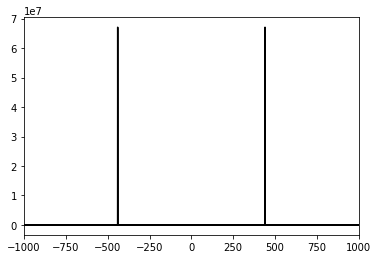

In [25]:
%matplotlib inline
'''

Parseval's Theorem and Conservation of Energy.

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**14
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))

# playsound(tone_data, vol = 0.5)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


# Power spectrum
# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is (|ft|/N)^2
N = len(tone_data)
print('N =', N)
pwr = (ft * ft.conj())/N**2

if pwr.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, pwr.real, 'k-')
plt.xlim([-1000, 1000])


print("Power spectrum summed: {:g}".format(pwr.sum()))
print('Sum of data squared divided by N: {:g}'.format((tone_data**2).sum()/N))
print('Sum of data squared divided by N: {:g}'.format((tone_data.astype(np.float)**2).sum()/N))



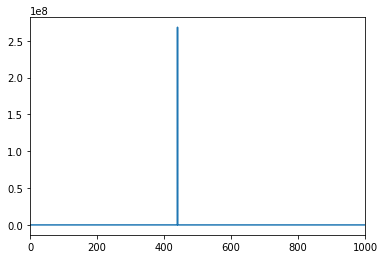

len(psd) 44101
Power spectral density integrated: 1.34206e+08


In [17]:
'''

Scipy's ready-made way of computing the (one-sided) power spectral density.


It probably ends at Nyquist Frequency (since going further doesn't gain new information) -- if so that that's another
advantage of using periodogram: it gets rid of four-fold redundancy, 1) +ve and -ve freq, 2) on the two sides of
the Nyquist frequency.


'''


from scipy import signal

# note the powers at the negative frequencies have been added to the powers of the corresponding 
# positive freqeuncies.
f, psd = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, psd)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print('len(psd)', len(psd))
# sum of psd * df
print('Power spectral density integrated: {:g}'.format((psd*df).sum()))

plt.show()

## Breakout: Two-frequency signal and PSD 

- ### Turn the above into a function the plot_psd(sound, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 3e7); it should return the power spectrum (psd)
- ### Generate a sigal that has two frequency components (fundamental frequencey (1st harmonic) + 2nd harmonic)
- ### Apply this funcion on a 2-freq sound and see if you get what you expected.
- ### Apply this function to shortBW

In [29]:
# psd stands for power spectrum density

def plot_psd(sound, sample_rate = 44100, duration = 0., freq_lim = 10000., pwr_lim = 3e7):
    f, psd = signal.periodogram(sound, sample_rate)
    plt.figure()
    plt.plot(f, psd)
    plt.xlim([0, 1000])
    plt.show()
    return psd



C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


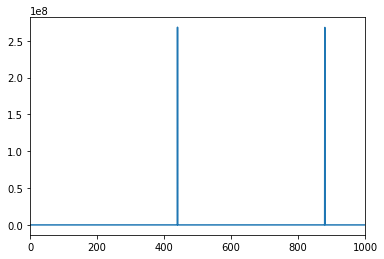

array([  0.00000000e+00,   6.16678847e-07,   6.97229893e-07, ...,
         1.08954194e-03,   9.95664508e-04,   3.60409496e-04], dtype=float32)

In [30]:
# two tone sound:
f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**14
tone_data1 = np.int16(amp*np.sin(np.pi*2*f*time_pts))
f2 = 880.
tone_data2 = np.int16(amp*np.sin(np.pi*2*f2*time_pts))

sound = tone_data1 + tone_data2
plot_psd(sound, duration = duration)

## Breakout -- Build a 3-band equalizer (may include this in HW06)
## Write a function: equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.)
- ### If any of the three weights is None, return input sound array; otherwise, do FT
- ### Split FT into three frequency ranges, < 500 Hz, [500 Hz, 1000 Hz], > 1000 Hz
- ### You can use signal_rec() to get the sound back for each of the frequency ranges
- ### You need to normalize the weights -- how would you do it?
- ### Put the three bands together according to the weight for each band, and get a new sound array.  If the weight ratio is 1:1:1, the new sound array should sound about the same as the original.
- ### Return the new sound array.
- ### Test it on the Barry White segment.

In [3]:
def signal_rec(ft, freq, filt = None, xlo = 0, xhi = 0.02):
    import copy
    ft_filt = copy.copy(ft)
    try:
        len(filt)
    except:
        # that is, it's OK to not have a filter
        pass
    else:
        ft_filt *= filt

    tone_data_rec = np.fft.ifft(ft_filt)
    tone_data_rec = np.int16(tone_data_rec.real)

    f1 = freq[freq > 0].min() 
    dur = 1/f1
    
    time_pts = np.linspace(0, dur, len(ft))
    
    plt.figure()
    plt.title('Real Part of Inverse FT')
    plt.plot(time_pts, tone_data_rec.real, 'b-')


    plt.figure()
    plt.title('Imaginary Part of Inverse FT')
    plt.plot(time_pts, tone_data_rec.imag, 'r-')
    print('max of the imaginary part', tone_data_rec.imag.max())

    # Rejecting the imaginary part
    tone_data_rec = tone_data_rec.real

    plt.figure()
    plt.plot(time_pts, tone_data_rec, 'g')
    plt.xlim([xlo, xhi])


    plt.show()
    
    return tone_data_rec

In [8]:
def equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.):
    if wt1 is None or wt2 is None or wt3 is None:
        return
    ft = np.fft.fft(sound)
    freq = np.fft.fftfreq(sound.shape[0], d = 1/sample_rate)
    
    sumwt = wt1 + wt2+ wt3
    filt1 = np.abs(freq) < 500.
    tone_data_rec1 = wt1 * signal_rec(ft, freq, filt = filt1) / sumwt
    
    filt2_1 = np.abs(freq) >= 500
    filt2_2 = np.abs(freq) < 1000
    filt2 = filt2_1 * filt2_2
    tone_data_rec2 = wt2 * signal_rec(ft, freq, filt = filt2) / sumwt
    
    filt3 = np.abs(freq) >= 1000
    tone_data_rec3 = wt3 * signal_rec(ft, freq, filt = filt3) / sumwt
    
    return tone_data_rec1 + tone_data_rec2 + tone_data_rec3

max of the imaginary part 0


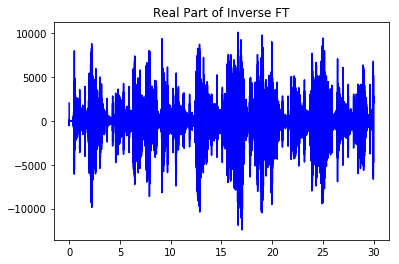

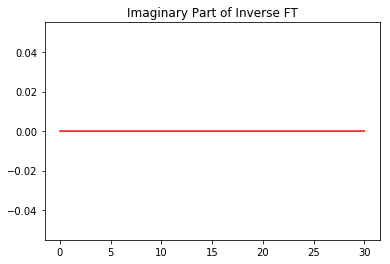

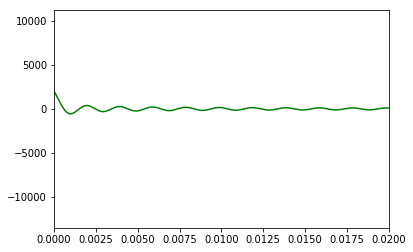

max of the imaginary part 0


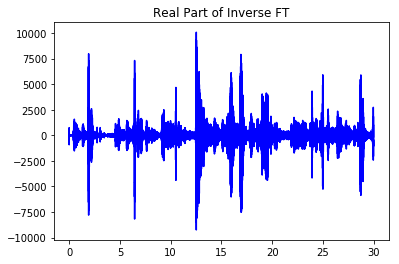

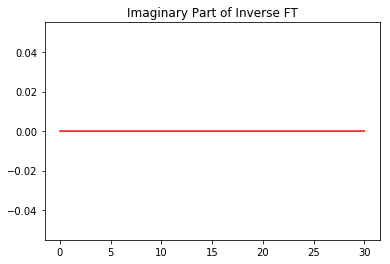

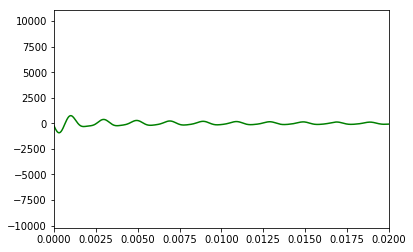

max of the imaginary part 0


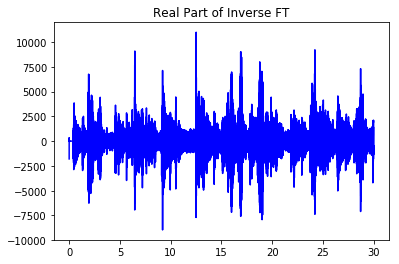

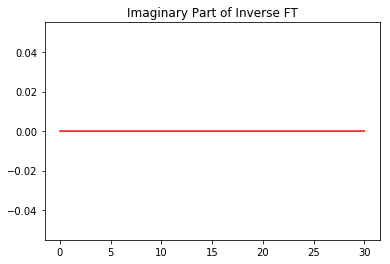

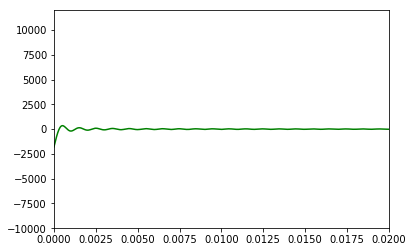

In [9]:
sample_rate, barry = read("BarryWhite30sec.wav")

playsound(sample_rate, equalizer(sample_rate, barry, 2, 1 ,1))

## End of week11-1

In [ ]:
'''
Largest int16

'''

import numpy as np

# largest 16-bit integer: 2^16 - 1
a = 2**16 - 1
add_n = 1
b = np.int16(a + add_n)
print('largest int16:'.format(a))
print('(largest int16) + {:d}:{:d}'.format(add_n, b))

In [ ]:
%matplotlib inline
'''
Trying to get the slider to work

https://ipython.org/ipython-doc/3/api/generated/IPython.html.widgets.widget_float.html

'''
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider, Button, RadioButtons



start_time = 1
end_time = 5
sample_rate, time_pts, shortBW = get_BW(start_time, end_time)

# sndarr = shortBW
# vol = 0.1
# sndarr = np.int16(vol*sndarr)

# def playsound_sl(vol = 0.1):
#     from scipy.io.wavfile import write
#     import os
#     write('tmp.wav', sample_rate, np.int16(vol*shortBW))
#     os.system("afplay tmp.wav") 
#     os.system("rm tmp.wav") 
#     return

vol_gl = 0.1

def vol_control(vol = 0.1):
    print vol
    vol_gl = vol

    return vol


vol_slider = widgets.FloatSliderWidget(min=0.1, max=1., step=0.1, value=0.1)
# b_slider = widgets.FloatSliderWidget(min=-5, max=5, step=0.3, value=0)
w=widgets.interactive(vol_control, vol=vol_slider)
display(w)


# #playsound(sample_rate, shortBW, vol = 0.5)

# # import IPython.html.widgets as widgets
# # from IPython.display import display


# playsound_sl(shortBW)




In [ ]:
print vol_gl
playsound(shortBW, vol = vol)

## Next HW: build your own 10 band equilizer.

In [ ]:
filt = freq < 500
ft_filt = filt * ft
tone_filt = np.fft.ifft(ft_filt)
time_pts = np.linspace(0, 2, 2*sample_rate)

plt.plot(tone_filt.real)
plt.figure()
plt.plot(tone_filt.imag)
plt.show()
#playsound(44100, tone_filt)

In [ ]:
%matplotlib inline

'''

This should be part of HW05 -- original, don't change.

Further improvement: define a __call__ so that objects of this class can also be used as a function that can applied
to other sound arrays (such as Barry White).

'''


from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
import os


class Tone:



    def __init__(self, f, duration, sample_rate = 44100):
        self.f = f
        self.dur = duration
        self.sr = sample_rate
        self.signal = np.zeros(self.dur*self.sr)
        self.orig_signal = np.zeros(self.dur*self.sr)
        self.overtones = {}
        self.OT_num = 0

        
    def comb_tones(self, *weights):
        
        if len(weights) == 0:
            weights = np.ones(self.OT_num + 1)/(self.OT_num + 1)
            print 'weights', weights   
        comb_signal = np.int16(self.orig_signal * weights[0])
        for i, overtone in self.overtones.iteritems():
            comb_signal += np.int16(weights[i-1] * overtone)
        
        self.signal = comb_signal
    
    
    
    def get_tone(self, play_sound = False):        
        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        amp = 2**14
        signal = np.int16(amp*np.sin(np.pi*2*self.f*time_pts))
        self.signal = signal
        if self.OT_num < 1:
            self.orig_signal = signal
        #set_trace()
        if play_sound:
            self.playsound()
    
    
        return signal
  
    def gen_overtone(self, multi, play_sound = False):
        true_self_f = self.f
        self.f *= multi
        self.OT_num += 1
        overtone = self.get_tone(play_sound = play_sound)
        self.overtones[multi] = overtone
        self.f = true_self_f
        
        return overtone
    
    

    def playsound(self, vol = 0.05):
        write('tmp.wav', self.sr, np.int16(self.signal*vol))
        os.system("afplay tmp.wav") 
        os.system("rm tmp.wav") 
        return

    def plot_fourier(self, freq_lim = 1000., amp_lim = 1e6):
        '''
        Given sample_rate and signal, plots the real and imaginary parts of DFT.
        '''

        sp = np.fft.fft(self.signal.astype(np.float))
        freq = np.fft.fftfreq(self.signal.shape[-1], d = 1./self.sr)
        plt.figure()
        plt.plot(freq, sp.real, 'b.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.figure()
        plt.plot(freq, sp.imag, 'g.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.show()
        


tone = Tone(440., 2.)
print tone.f
sound = tone.get_tone()
tone.playsound()
tone.plot_fourier()
overtone = tone.gen_overtone(2, play_sound = True)
overtone = tone.gen_overtone(3, play_sound = True)
overtone = tone.gen_overtone(4, play_sound = True)

print tone.OT_num

#weights = np.sqrt(np.array([0.25, 0.25, 0.25, 0.25]))
weights = np.array([0.25, 0.25, 0.25, 0.25])

#weights = np.array([0.4, 0.4, 0.1, 0.1])

tone.comb_tones(*weights)
tone.playsound()
tone.plot_fourier(freq_lim=2000.)




In [ ]:
%matplotlib inline

'''

This should be part of HW05

Further improvement: define a __call__ so that objects of this class can also be used as a function that can applied
to other sound arrays (such as Barry White).

'''


from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
from scipy import signal
import os


class Tone:

    def __init__(self, sample_rate = 44100):
        self.f = 0.
        self.dur = 0.
        self.sr = sample_rate
        self.signal = 0
        self.orig_signal = 0
        self.overtones = {}
        self.OT_num = 0

    def clear(self):
        self.__init__()
        
    def comb_tones(self, *weights):
        
        if len(weights) == 0:
            weights = np.sqrt(np.ones(self.OT_num + 1)/(self.OT_num + 1))
            print 'weights', weights   
        comb_signal = np.int16(self.orig_signal * weights[0])
        for i, overtone in self.overtones.iteritems():
            comb_signal += np.int16(weights[i-1] * overtone)
        
        self.signal = comb_signal
        return self.signal
    
    
    
    def get_tone(self, f = 440, duration = 0.5, play_sound = False):  
        self.f = f
        self.dur = duration

        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        amp = 2**14
        signal = np.int16(amp*np.sin(np.pi*2*self.f*time_pts))
        self.signal = signal
        if self.OT_num < 1:
            self.orig_signal = signal
        #set_trace()
        if play_sound:
            self.playsound()
    
    
        return signal
  
    def gen_overtone(self, multi, play_sound = False):
        true_self_f = self.f
        self.f *= multi
        print 'f in get_overtone', self.f
        self.OT_num += 1
        overtone = self.get_tone(f = self.f, duration = self.dur, play_sound = play_sound)
        self.overtones[multi] = overtone
        self.f = true_self_f
        
        #return overtone
    
    

    def playsound(self, sound = None, sample_rate = 44100, vol = 0.05):
        if sound == None:
            write('tmp.wav', self.sr, np.int16(self.signal*vol))
        else:
            write('tmp.wav', sample_rate, np.int16(sound*vol))
        os.system("afplay tmp.wav") 
        os.system("rm tmp.wav") 
        return

    def plot_fourier(self, sound = None, sample_rate = 44100, freq_lim = 1000., amp_lim = 1e6):
        '''
        Given sample_rate and signal, plots the real and imaginary parts of DFT.
        '''
        if sound == None:
            signal = self.signal.astype(np.float)
            samp_rate = self.sr
        else:
            signal = sound
            samp_rate = sample_rate
        
        sp = np.fft.fft(signal)
        freq = np.fft.fftfreq(signal.shape[0], d = 1./samp_rate)
        plt.figure()
        plt.plot(freq, sp.real, 'b.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.figure()
        plt.plot(freq, sp.imag, 'g.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.show()

    def plot_psd(self, outside_signal = None, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 2e7):
        
        if outside_signal == None:
            sound = self.signal.astype(np.float)
            samp_rate = self.sr
        else:
            sound = outside_signal
            samp_rate = sample_rate       
            
        duration = float(len(sound))/samp_rate
        
        f, Pxx_den = signal.periodogram(sound, samp_rate)
        df = 1./duration
        plt.figure()
        plt.plot(f, Pxx_den)
        plt.xlim([0, freq_lim])
        plt.ylim([0, pwr_lim])

        plt.show()

    def plot_sound(self, t_lim = 0.02):
        time_pts = np.arange(len(self.signal))/float(self.sr)
        plt.figure()
        plt.plot(time_pts, self.signal)
        plt.xlim([0, t_lim])
        plt.show()

        
        
        
def rich_tone(f, duration):
    tone = Tone()

    simple_tone = tone.get_tone(f, duration)
    tone.gen_overtone(2)
    tone.gen_overtone(3)
    tone.gen_overtone(4)
    rich_tone = tone.comb_tones()
    print 'inside rich_tone', tone.f

    #tone.clear()
    return simple_tone, rich_tone, tone
    
    
A_simp, A, tone = rich_tone(440., .5)
tone.playsound()
tone.plot_sound()
tone.plot_psd(freq_lim = 3000.)
B_simp, B, tone = rich_tone(493.88, .5)    
tone.plot_psd(freq_lim = 3000.)
D_simp, D, tone = rich_tone(587.33, .5)    
tone.plot_psd(freq_lim = 3000.)
G_simp, G, tone = rich_tone(784./2, .5)
tone.plot_psd(freq_lim = 3000.)


# D = tone.get_tone(587.33, .5)
# tone.gen_overtone(2)
# tone.gen_overtone(3)
# tone.gen_overtone(4)
# D = tone.comb_tones()

# tone.clear()

# A = tone.get_tone(440., 0.5)
# tone.gen_overtone(2)
# tone.gen_overtone(3)
# tone.gen_overtone(4)
# A = tone.comb_tones()

# tone.clear()

tone = Tone()
song = np.concatenate((B, A, G, A, B, B, B, B, A, A, A, A))
tone.plot_psd(song, freq_lim = 3000.)


#tone.playsound()

song = np.concatenate((B, A, G, A, B, B, B, B, A, A, A, A, B, D, D, D, D) ) #, D, D))
tone.playsound(song, vol = 0.2)



#playsound(sample_rate, song)

# tone.plot_fourier()
# overtone = tone.gen_overtone(2, play_sound = True)
# overtone = tone.gen_overtone(3, play_sound = True)
# overtone = tone.gen_overtone(4, play_sound = True)

# print tone.OT_num

# weights = np.sqrt(np.array([0.25, 0.25, 0.25, 0.25]))
# #weights = np.array([0.25, 0.25, 0.25, 0.25])

# #weights = np.array([0.4, 0.4, 0.1, 0.1])

# tone.comb_tones(*weights)
# tone.playsound()
# tone.plot_fourier(freq_lim=2000.)




In [ ]:
Atone_freq = 440.
tone1 = get_tone(44100, Atone_freq, 2., play_sound=True)

In [ ]:
sample_rate = 44100
Atone_freq = 440.
tone1 = get_tone(sample_rate, Atone_freq, 2.)
tone2 = get_tone(sample_rate, Atone_freq*2, 2.)
tone3 = get_tone(sample_rate, Atone_freq*3, 2.)

sound = np.int16(0.75*tone1) + np.int16(0.25*tone2)



sound = np.int16(0.75*tone1 + 0.25*tone2)


# sound = np.int16(tone1 + 0.75*tone2)
# sound = tone1/2 + tone2/2

playsound(sample_rate, sound)
# plot_fourier(44100, sound)
# playsound(sampl_rate, sound)

In [ ]:
'''Play a tone at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write
import matplotlib.pyplot as plt


f = 440.*2
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)



# freq = 440.*2
# sample_rate = 44100.
# duration = 3
# time_pts = np.linspace(0, duration, duration*sample_rate)
# amp = 2**7
# tone_data = amp*np.sin(np.pi*2*freq*time_pts)
# tone_data = np.uint8(tone_data)

plot_fourier(sample_rate, Atone_data, freq_lim = 1000.)


In [ ]:
'''Play the A tone at twice the sampling rate '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
tone_data = amp*np.sin(np.pi*2*freq*time_pts)
tone_data = np.uint8(tone_data)

write('tone2.wav', sample_rate*2, tone_data)
os.system("afplay Atone.wav") 
os.system("afplay tone2.wav") 
# Do scientific python note A and sample rate

In [ ]:
'''Play the A tone at 440 Hz and another at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)

Atone_data = np.sin(np.pi*2*freq*time_pts)
Atone_dbl = np.sin(np.pi*2*freq*2*time_pts)
#Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)


amp1 = 2**6
amp2 = 2**5

#sound_data = amp1*Atone_data + amp2*Atone_dbl 


Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)
amp3 = 2**3
sound_data = amp1*Atone_data + amp2*Atone_dbl + amp3*Atone_tpl 
sound_data = sound_data.astype(np.uint8)

write('sound.wav', sample_rate, sound_data)
#os.system("afplay Atone.wav") 
os.system("afplay sound.wav") 
# Do scientific python note A and sample rate

In [ ]:
import numpy as np
from scipy.io.wavfile import write
lo_rate = rate/8
write('lo_pitch_dolph.wav', lo_rate, dolph_snd)
os.system("afplay tuimelaar.wav") 
os.system("afplay lo_pitch_dolph.wav") 

## Breakout:
## Write a function that takes a numpy array, and a play rate, creates a temp wav file, plays the sound, then removes (rm) the temp file.  Call it playsound().

In [ ]:
import numpy as np
from scipy.io.wavfile import write

data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('test.wav', 44100, scaled)
print 'done'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os
rate, barry_white = read("BarryWhite30sec.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print 'rate', rate
print 'data type', barry_white.dtype

# It has two columns: stereosound!
print barry_white.shape
start_time = 1
end_time = 15
duration = end_time - start_time
shortBW = barry_white[start_time*rate: end_time*rate, :]
print shortBW.shape
plt.plot(shortBW)

# shortBW = shortBW/2
# print 'data type', shortBW.dtype


# just one channel
shortBW = shortBW[:, 0]
print shortBW.shape
# shortBW = shortBW/2
# print 'data type', shortBW.dtype


playsound(rate, shortBW)

# write('shortBW.wav', rate, shortBW)
# os.system('afplay shortBW.wav')
plt.figure()
plt.plot(shortBW)
plt.show()




In [ ]:
sp = np.fft.fft(shortBW.astype(np.float))
t = np.linspace(start_time, end_time, shortBW.shape[0])
plt.figure()
plt.plot(t)
#freq = np.fft.fftfreq(t.shape[-1])
#freq = np.linspace(-rate/2., rate/2., sp.shape[0])
print freq.shape
# freq = np.fft.fftfreq( (shortBW*rate).shape[-1] )
# plt.plot(freq, sp.real, 'b.')
# plt.figure()
# plt.plot(freq, sp.imag, 'g.')
# plt.show()
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()

In [ ]:
BW_back = np.fft.ifft(sp).real
print 'data type', BW_back.dtype
BW_back = np.int16(BW_back)
playsound(rate, BW_back)

plt.plot(BW_back)
plt.show()
# write('BW_back.wav', rate, BW_back)
# os.system('afplay BW_back.wav')



## End of week 9

In [ ]:
os.system("afplay test.wav") 

## Breakout: download animal sounds in wav format and make a class that make jungle sound

### You can specify the kinds of animals
### how many of each
### how loud each should be
### optional: time-variation of an animal sound

## Slides: Then talk about Fourier Transform and then DFT and FFT
## End with FFT of the dolphin sound signal -- that's what you see as the equalizer -- then enhance the low freq part of the sound: now you get a dolphin that sounds like Barry White. (Alternatively take a Barry White sound clip (The beginning of Can't Get Enough of Your Love Baby, remove the low freq part -- outrageous!)

In [ ]:
f = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)

sp = np.fft.fft(Atone_data.astype(np.float))
t = np.linspace(0, duration, Atone_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.space(-1/)
#freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()


In [ ]:
import numpy as np
from scipy.io.wavfile import write
# loud_dolph = (dolph_snd * 1.5).astype(int)
loud_dolph = np.uint8(dolph_snd * 2.5)
print rate, loud_dolph.max()
plt.plot(loud_dolph)
write('loud_dolph.wav', rate, loud_dolph)
os.system("afplay quiet_dolph.wav") 
os.system("afplay loud_dolph.wav") 

In [ ]:
'''remove low frequencies'''
plt.plot(freq, sp.real, 'b.')
plt.xlim([-1e-2, 1e-2])
plt.show()

In [ ]:
sp = np.fft.fft(sound_data.astype(np.float))
t = np.linspace(0, duration, sound_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()



In [ ]:
'''get fft for 2 freq right'''

f = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)

sp = np.fft.fft(Atone_data.astype(np.float))
t = np.linspace(0, duration, Atone_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.space(-1/)
#freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()


## Next Week
## What does a square wave sound like?  How many Fourier components do you have to keep in order to make the Fouirer decomposition sound like the original square wave?
## 1. Talk about a subtlety: Aliasing
## 1. FFT for 2D image
## 2. Convolution of a 2D image with its border
## 3. Cleaning up a 2D image
## 4. Fractal

In [ ]:
import matplotlib.pyplot as plt
t = np.arange(256)
print t.shape, t.shape[0]
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()

In [ ]:
# don't run this: too long and no way to stop
os.system("afplay Ya_Lo_Se.m4a")

In [ ]:
import scitools

In [ ]:
import pygame

In [ ]:
s = Sound() 
s.read('sound.wav') 
s.play()